In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
app_events = pd.read_csv('./input/app_events.csv')
app_labels = pd.read_csv('./input/app_labels.csv')
events = pd.read_csv('./input/events.csv')
gender_age_test = pd.read_csv('./input/gender_age_test.csv')
gender_age_train = pd.read_csv('./input/gender_age_train.csv')
label_categories = pd.read_csv('./input/label_categories.csv')
phone_brand_device_model = pd.read_csv('./input/phone_brand_device_model.csv')

/home/kevin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/kevin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [5]:
gender_age_train.device_id.describe()

count    7.464500e+04
mean    -7.491354e+14
std      5.327150e+18
min     -9.223067e+18
25%     -4.617367e+18
50%     -1.841362e+16
75%      4.636656e+18
max      9.222849e+18
Name: device_id, dtype: float64

In [6]:
gender_age_train.device_id.unique().size

74645

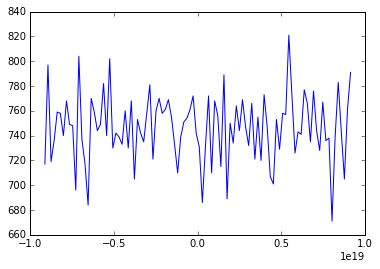

In [7]:
y,binEdges=np.histogram(gender_age_train.device_id,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-')
plt.show()

Device ids are all unique and does not have any pattern

M    47904
F    26741
Name: gender, dtype: int64


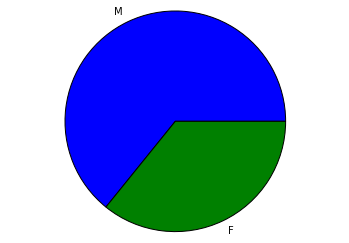

In [17]:
counts = gender_age_train.gender.value_counts()
print(counts);

plt.pie(counts.values, labels=counts.keys())
plt.axis('equal')
plt.show()

count    74645.000000
mean        31.410342
std          9.868735
min          1.000000
25%         25.000000
50%         29.000000
75%         36.000000
max         96.000000
Name: age, dtype: float64


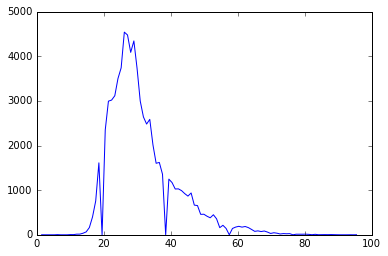

In [21]:
print(gender_age_train.age.describe())

y,binEdges=np.histogram(gender_age_train.age,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-')
plt.show()

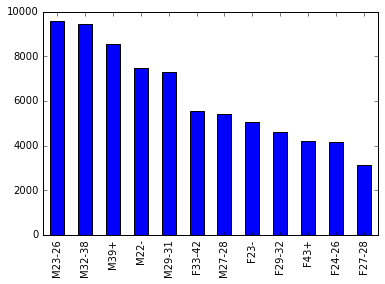

In [26]:
gender_age_train.group.value_counts().plot(kind='bar')

In [28]:
gender_age_test.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


In [29]:
len(gender_age_test.index)

112071

# app_events

In [30]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [32]:
len(app_events.index)

32473067

In [36]:
app_events.event_id.value_counts()

3215932    320
1827617    304
2849072    304
2325136    303
3085011    303
1923040    303
2805295    302
2679507    302
2412744    302
1160746    300
2990638    299
219629     298
956087     298
2328996    297
2989536    261
2204686    261
1472406    261
649636     261
2932987    261
2470660    261
2573741    261
1801966    261
1598158    261
1324254    261
1874044    261
2826735    261
2227905    261
2084776    255
79641      254
1359558    251
          ... 
2682884      1
2597984      1
1247580      1
2745773      1
914594       1
2568701      1
745980       1
1385012      1
635946       1
1032734      1
3207938      1
1270524      1
2182932      1
2887356      1
2273610      1
1778676      1
2450492      1
574206       1
2729380      1
1210197      1
407005       1
1155749      1
193861       1
1893133      1
13597        1
898221       1
936692       1
985820       1
2319613      1
575841       1
Name: event_id, dtype: int64

In [37]:
app_events.is_installed.value_counts()

1    32473067
Name: is_installed, dtype: int64

In [38]:
app_events.is_active.value_counts()

0    19740071
1    12732996
Name: is_active, dtype: int64

# app_labels

In [39]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [42]:
app_labels.label_id.value_counts()

548    56902
405    53936
794    49320
795    48707
704    45697
714    19083
713    11840
854     9955
710     9027
711     8831
796     7375
810     7052
721     5910
800     5147
811     5135
813     5124
730     4619
798     3608
857     2723
870     2582
812     2496
777     2471
805     2353
802     2327
549     2243
251     2208
803     2162
783     2028
797     1972
756     1955
       ...  
692        3
990        3
989        3
988        3
986        3
218        2
242        2
216        2
174        2
173        2
924        2
735        2
249        2
563        1
4          1
41         1
763        1
2          1
553        1
21         1
246        1
244        1
265        1
199        1
921        1
155        1
270        1
696        1
48         1
146        1
Name: label_id, dtype: int64

# events

In [43]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [44]:
len(events.index)

3252950

# label_categories

In [45]:
label_categories.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [46]:
label_categories.category.value_counts()

unknown                       26
Science and Technology         3
Insurance                      3
music                          3
Lottery ticket                 3
Financial Information          3
health                         3
the film                       3
Pay                            3
navigation                     2
movie                          2
classical                      2
pursue                         2
Shoes                          2
free                           2
ARPG                           2
vitality                       2
Medical                        2
Customization                  2
Smart Shopping                 2
Simple                         2
Mother                         2
show                           2
Games                          2
natural                        2
Crowdfunding                   2
comfortable                    2
Relatives                      2
Phone                          2
mobile bank                    2
          

# phone_brand_device_model

In [47]:
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [48]:
phone_brand_device_model.phone_brand.value_counts()

小米      43210
三星      34286
华为      32564
vivo    14395
OPPO    14289
魅族      11853
酷派       8407
联想       6761
金立       2768
HTC      2682
中兴       2096
乐视       1930
索尼       1821
努比亚      1144
LG        763
中国移动      671
TCL       586
朵唯        544
锤子        535
优米        492
海信        489
一加        438
语信        396
奇酷        378
天语        376
摩托罗拉      228
酷比        165
ZUK       153
酷比魔方      152
美图        151
        ...  
摩乐          5
优语          5
本为          4
唯比          4
惠普          4
宝捷讯         4
天宏时代        4
鲜米          3
大显          3
丰米          3
赛博宇华        2
戴尔          2
恒宇丰         2
MIL         2
原点          2
飞秒          2
世纪星         2
凯利通         2
嘉源          1
帷幄          1
E人E本        1
西门子         1
瑞高          1
碟米          1
欧乐酷         1
宏碁          1
德卡诺         1
极米          1
ZOYE        1
亚马逊         1
Name: phone_brand, dtype: int64

In [49]:
phone_brand_device_model.device_model.value_counts()

红米note              7358
MI 3                5712
MI 2S               5308
Galaxy Note 3       5019
MI 4                4798
Galaxy S4           4059
Galaxy Note 2       3993
荣耀6                 3076
荣耀畅玩4X              2754
荣耀3C                2598
红米1S                2479
红米                  2438
Galaxy S3           2415
Mate 7              2406
魅蓝NOTE              2134
红米2                 2090
红米Note2             2035
Galaxy S5           1758
MX3                 1751
红米2A                1741
魅蓝Note 2            1732
荣耀6 Plus            1690
红米note增强版           1674
荣耀3X畅玩版             1601
MX4                 1599
小米note              1539
R7                  1457
Ascend P7           1417
荣耀畅玩4C              1400
MI 2                1312
                    ... 
飞马3                    1
A790e                  1
Nexus 5X               1
T9500                  1
V701s Core4            1
P21                    1
A375e                  1
P589L                  1
Galaxy Grand Max       1
